## Business Context
#### Pharmaceutical companies invest millions of dollars in clinical trials to test drug efficacy. However, some drugs do not work for all patients due to individual differences in biology, metabolism, and pre-existing conditions.
#### Traditional clinical trials take years to conclude, with high costs and risks.
#### Machine learning models can help predict drug response early, saving time and resources.
#### Personalized medicine ensures that patients receive the right drug at the right dose.
-------------------------------------------------------------------------------------------------------------------------------
#### Drug Response Classification (0 = No response, 1 = Positive response)
#### Drug response classification refers to how a patient’s body reacts to a particular drug. This is a key concept in pharmaceutical research and clinical trials, where researchers analyze whether a drug is effective or not based on biological responses.
#### Interpretation of Classification Labels:
1.	0 = No Response
    - The drug did not have a significant effect on the patient.
    - The patient’s condition remained unchanged after taking the drug.
    - The biomarkers (e.g., blood pressure, glucose level, heart rate) did not improve.
    - Possible reasons:
        - The drug is not suitable for the patient.
        - The dosage is ineffective.
        - The patient's metabolism is resistant to the drug.
2.	1 = Positive Response
    - The drug had a beneficial effect on the patient.
    - The patient’s condition improved after taking the drug.
    - Biomarkers such as blood pressure, glucose levels, and enzyme activity show significant improvement.
    - Possible reasons:
        - The drug is effective for this patient.
        - The dosage is appropriate.
        - The patient’s metabolism responds well to the drug.



Why is This Classification Important?
* Pharmaceutical Industry: Used to test new drugs and evaluate their effectiveness before FDA approval.
* Personalized Medicine: Helps doctors prescribe drugs based on individual patient responses.
* Machine Learning in Healthcare: Enables predictive models to forecast patient responses based on medical data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import os

In [4]:
# Load dataset
df=pd.read_csv("C:\\Users\\moulika\\Downloads\\Pharma_Industry.csv")
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [9]:
# Basic inspection
print("Shape of dataset:", df.shape)
print("Columns:")
print(df.columns.tolist())

Shape of dataset: (500, 6)
Columns:
['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)', 'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)', 'Blood Glucose Level (mg/dL)', 'Drug Response']


In [8]:
print("First 5 rows:")
display(df.head())


First 5 rows:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [11]:
print("Data info:")
df.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [12]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


In [14]:
# Choose target column (auto-detect 'response' or fallback to last column)
target_candidates = [c for c in df.columns if 'response' in c.lower() or 'label' in c.lower() or 'target' in c.lower()]
if len(target_candidates) >= 1:
    target_col = target_candidates[0]
else:
    target_col = df.columns[-1]
print("Chosen target column:", target_col)

Chosen target column: Drug Response


In [17]:
# Prepare features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# If target is non-numeric, encode it
if y.dtype == object or not np.issubdtype(y.dtype, np.number):
    print("Encoding target values:")
    print("Unique target values before encoding:", y.unique())
    y = pd.factorize(y)[0]
    print("Unique encoded target values:", np.unique(y))

# For simplicity keep only numeric features 
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
non_numeric = [c for c in X.columns if c not in numeric_cols]
print("Numeric feature columns (kept):", numeric_cols)
if non_numeric:
    print("Non-numeric columns dropped (or encode them if needed):", non_numeric)

X_num = X[numeric_cols].copy()

Numeric feature columns (kept): ['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)', 'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)', 'Blood Glucose Level (mg/dL)']


In [20]:
# Impute missing values and scale
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=numeric_cols)
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=numeric_cols)

print("After imputation and scaling first 5 rows:")
display(X_scaled.head())

After imputation and scaling first 5 rows:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.092732,0.070867,-2.002791,0.206990,-0.631013
1,-1.847387,2.126409,-1.022016,2.855174,-0.557178
2,-1.240800,-1.409406,0.309741,-0.385545,0.369541
3,2.074016,-1.089396,-0.854298,0.934898,-0.662906
4,0.423799,0.259527,-0.094885,1.869634,-0.802079


In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (400, 5) Test shape: (100, 5)


Logistic Regression Accuracy: 0.71
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        48
           1       0.73      0.69      0.71        52

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

Confusion Matrix (Logistic Regression):
[[35 13]
 [16 36]]


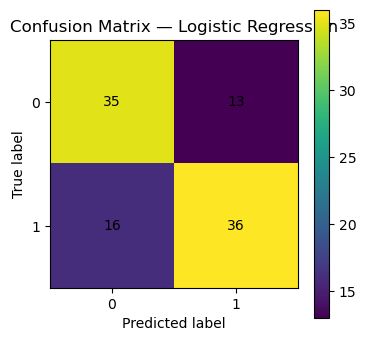

In [23]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", acc_lr)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(cm_lr)

# Plot confusion matrix for logistic regression
plt.figure(figsize=(4,4))
plt.imshow(cm_lr, interpolation='nearest')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        plt.text(j, i, cm_lr[i, j], ha="center", va="center")
plt.show()

Random Forest Accuracy: 0.76
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        48
           1       0.75      0.81      0.78        52

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100

Confusion Matrix (Random Forest):
[[34 14]
 [10 42]]


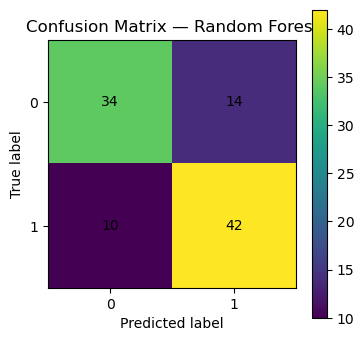

In [25]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Plot confusion matrix for random forest
plt.figure(figsize=(4,4))
plt.imshow(cm_rf, interpolation='nearest')
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center")
plt.show()

In [27]:
# Choose best model and save the pipeline components
if acc_rf >= acc_lr:
    best_model = rf
    best_name = "random_forest"
    best_acc = acc_rf
else:
    best_model = lr
    best_name = "logistic_regression"
    best_acc = acc_lr

model_path =("C:\\Users\\moulika\\Downloads\\Pharma_Industry.csv")
joblib.dump({
    "model": best_model,
    "imputer": imputer,
    "scaler": scaler,
    "numeric_cols": numeric_cols,
    "target_col": target_col
}, model_path)

print(f"Best model: {best_name} (accuracy {best_acc:.4f}). Saved to {model_path}")

Best model: random_forest (accuracy 0.7600). Saved to C:\Users\moulika\Downloads\Pharma_Industry.csv


In [28]:
# Example predictions on a few test samples
sample_X = X_test.head(5)
sample_true = y_test[:5].values
sample_pred = best_model.predict(sample_X)
print("Sample inputs (first 5 rows of test set):")
display(sample_X)
print("True labels:", sample_true)
print("Predicted labels:", sample_pred)

# If file created, show path
if os.path.exists(model_path):
    print(f"Model saved at: {model_path}")

Sample inputs (first 5 rows of test set):


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
122,-1.516582,0.648512,1.081165,1.195295,0.056652
161,-0.806845,-0.065956,0.023967,0.232998,0.137166
475,0.011600,1.354814,0.223778,-0.760257,0.247430
405,0.484539,0.742437,0.866178,-1.687315,-0.837907
101,1.347830,-0.281368,0.509595,-0.981550,-0.358694


True labels: [1 0 1 0 0]
Predicted labels: [1 0 1 0 0]
Model saved at: C:\Users\moulika\Downloads\Pharma_Industry.csv
